# Data Science

***


WS 2022

Dr. Cristian Grozea


***

## Classification and Regression


# Course Plan

1. Introduction to Machine Learning (ML)
    * Examples of Applications
    * Types of machine learning
    * Issues around ML
    * Testing and Validation
1. Classification and Regression
    * Datasets
    * Binary classification
    * Accuracy measures
    * Multiclass classification
1. Various model types and Training models
    * Linear regression
    * Polynomial regression
    * Regularisation
    * Logistic Regression
1. Support Vector Machines
1. Decision Trees
1. Ensemble Learning and Random Forest
1. Dimensionality Reduction
1. Unsupervised Learning

    


# Last Lecture
## Issues around ML 

Generalization issues
* _How do we check for those?_
* _Overfitting_ the training data 
* _Underfitting_ the training data


## Testing and Validation. Data Split
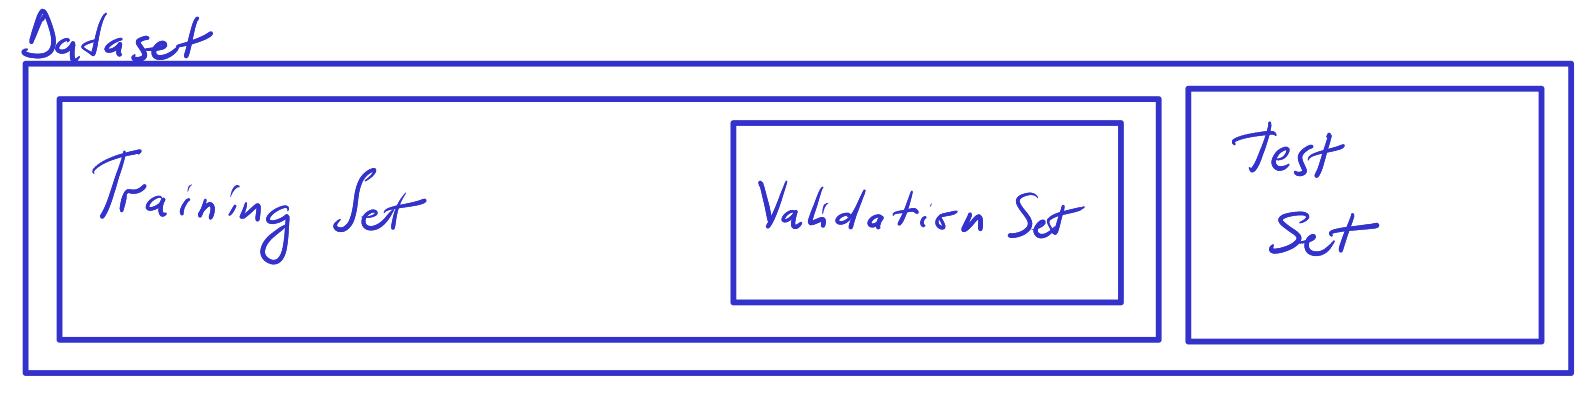

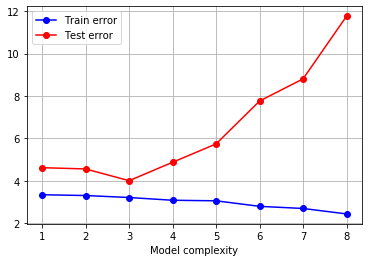

## Sklearn (Scikit-Learn) 
https://scikit-learn.org

# Cross-Validation
2-fold, N-Fold

# Today: Binary Classification
* The mathematical aspects
* Examples
* Error measurement, incl. AUC
* Confusion matrix
* (given enough time) extensions to multi-class 


## Data separation


### Live Explanation
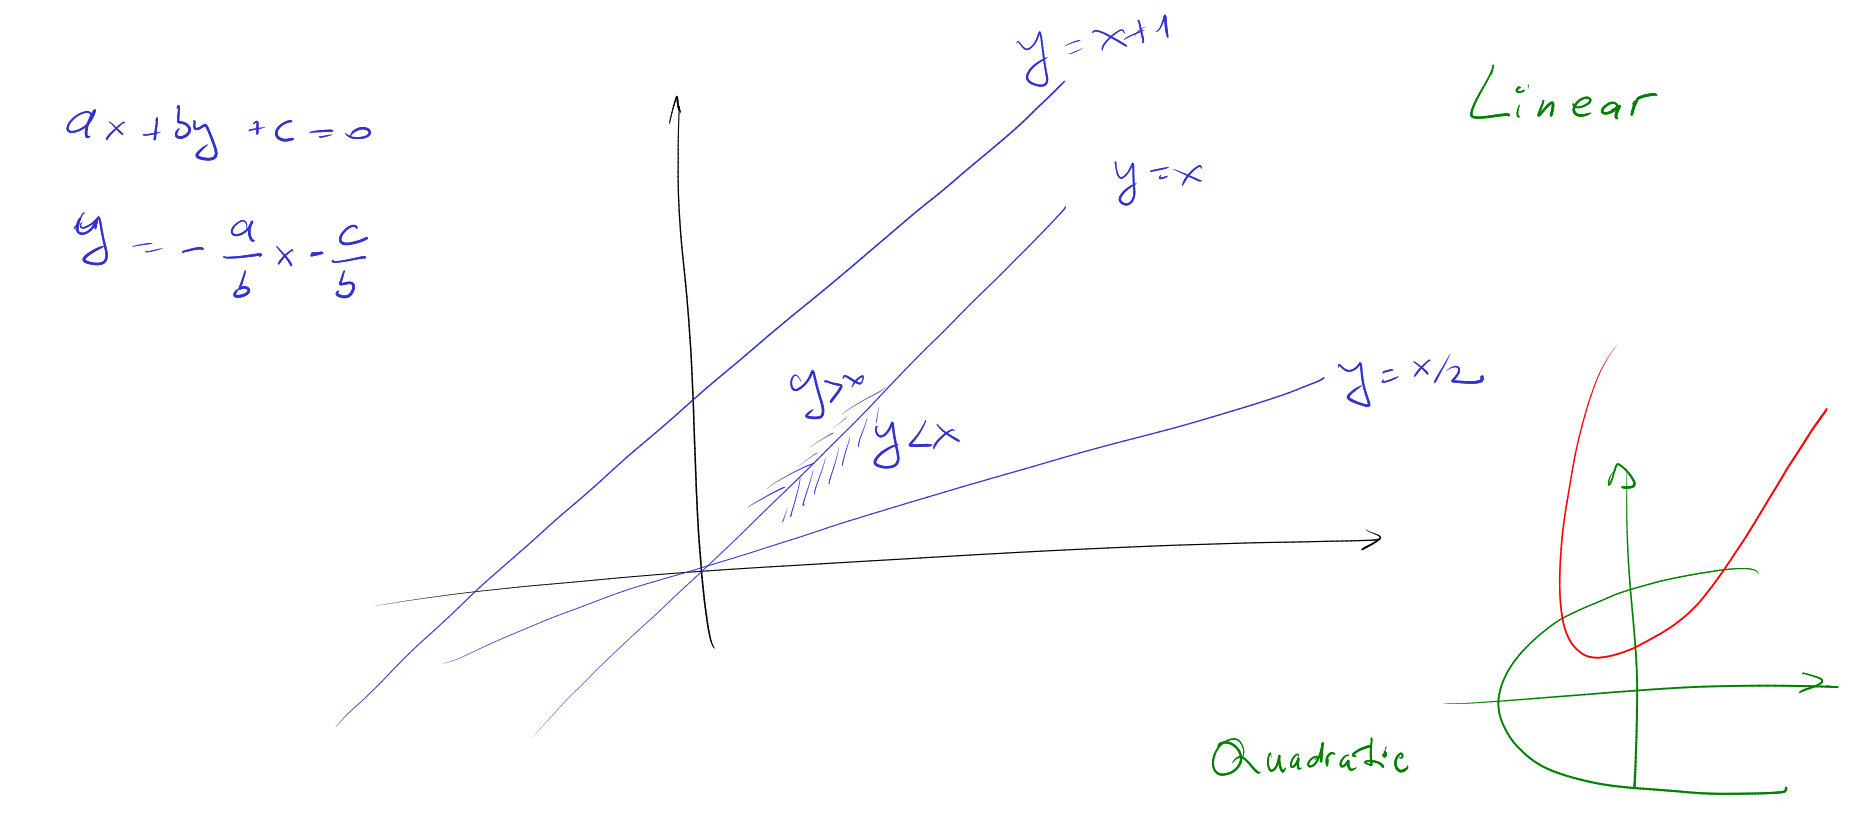

### Example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
np.random.seed(191) #repeatable results!
mycmap='Spectral'

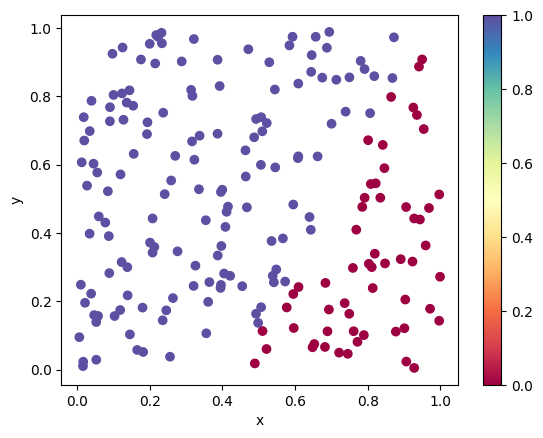

In [2]:
N=200
data=np.random.rand(N,2)
real_class_function=lambda pt:(pt[:,1]>2*pt[:,0]-0.9).astype('int8')
t=real_class_function(data)
plt.scatter(data[:,0],data[:,1],c=t,cmap=mycmap);plt.xlabel('x');plt.ylabel('y')
plt.colorbar()

In [3]:
# plt.colormaps()

See https://matplotlib.org/stable/tutorials/colors/colormaps.html

### Add Class Noise

In [4]:
selection=np.random.rand(N)<10/100.0
t[selection]=1-t[selection]

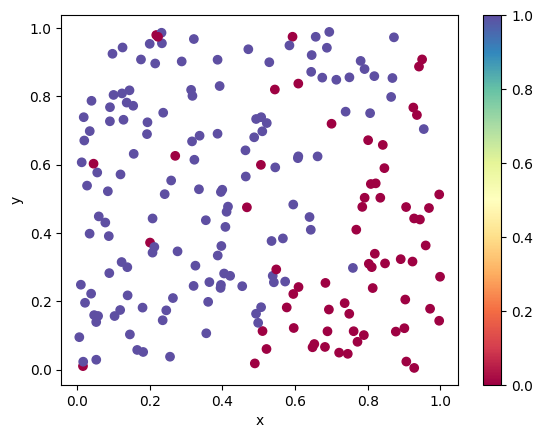

In [5]:
plt.scatter(data[:,0],data[:,1],c=t,cmap=mycmap);plt.xlabel('x');plt.ylabel('y')
plt.colorbar()

In [6]:
#save it for later
np.save(f"artif_dataset_{N}.npy",{'data':data,'t':t})

### Examination

In [7]:
data[:5,:]

array([[0.54160975, 0.25550893],
       [0.13920851, 0.21722092],
       [0.31387776, 0.81856237],
       [0.2335719 , 0.95478139],
       [0.90067052, 0.12112394]])

In [8]:
t[:5]

array([1, 1, 1, 1, 0], dtype=int8)

### Data Split

In [9]:
from sklearn.model_selection import train_test_split
data_train, data_test, t_train, t_test = train_test_split(
    data,t, test_size=0.3, random_state=42, stratify=t)

### Try regression?

find the mapping inputs -> outputs

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
m = LinearRegression()
errors=-cross_val_score(m,data_train,t_train,cv=3,scoring='neg_root_mean_squared_error')
errors

array([0.38462475, 0.31961219, 0.39069932])

### Improper scoring/error function
* how many are right?
* what does it mean, 0.3?

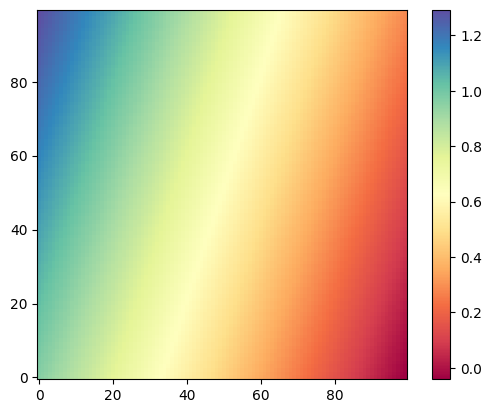

In [11]:
#outcome
m=m.fit(data_train,t_train)
plt.imshow(
    np.fromfunction(
        lambda x,y:
        m.predict(np.array(np.vstack((x.ravel()/100,y.ravel()/100)).T)),
        (100,100)
    ).reshape(100,-1).T,
    cmap=mycmap, 
    origin='lower'
)
plt.colorbar()

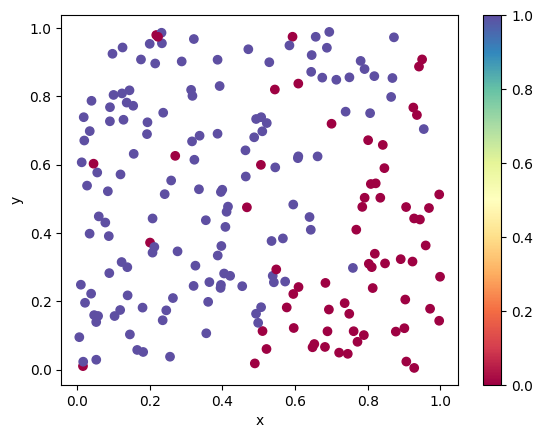

In [12]:
plt.scatter(data[:,0],data[:,1],c=t,cmap=mycmap);plt.xlabel('x');plt.ylabel('y')
plt.colorbar()

### Evaluation Metrics

### Accuracy
* (def) How many class values are predicted correctly

In [13]:
t_test_pred=m.predict(data_test)
accuracy_percent=100*np.sum(t_test_pred==t_test)/len(t_test)
accuracy_percent

0.0

#### None?

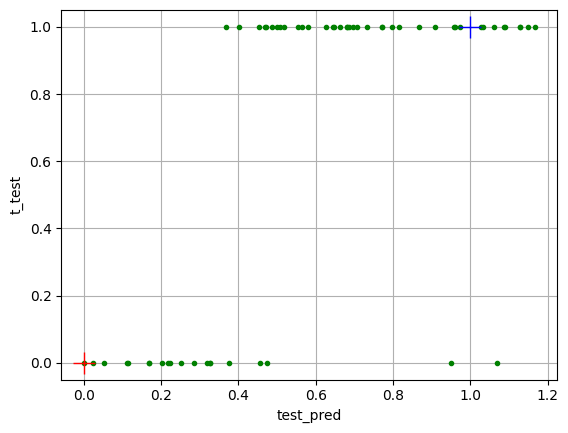

In [14]:
plt.plot(t_test_pred,t_test,'g.');plt.xlabel('test_pred');plt.ylabel('t_test')
plt.plot([0],[0],'r+',ms=16)
plt.plot([1],[1],'b+',ms=16)
plt.grid(1)

## Thresholding
### The N-shaped Plot
#### Interactive explanation

accuracy=0.6333333333333333


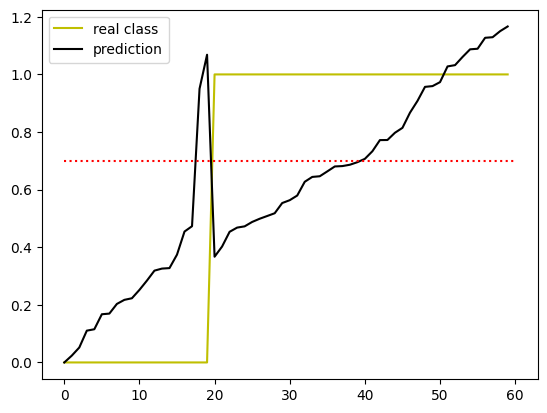

In [31]:
ix=np.argsort(t_test_pred+1e5*t_test)
plt.plot(t_test[ix],'y')
plt.plot(t_test_pred[ix],'k')
plt.legend(['real class','prediction'])
# thr=0.5;plt.plot([0,len(ix)],thr*np.ones(2),'r:');print(f"accuracy={np.sum((t_test_pred>thr)==t_test)/len(t_test)}")
# thr=0.3;plt.plot([0,len(ix)],thr*np.ones(2),'r:');print(f"accuracy={np.sum((t_test_pred>thr)==t_test)/len(t_test)}")
thr=0.7;plt.plot([0,len(ix)],thr*np.ones(2),'r:');print(f"accuracy={np.sum((t_test_pred>thr)==t_test)/len(t_test)}")

### The effect of the threshold choice on accuracy

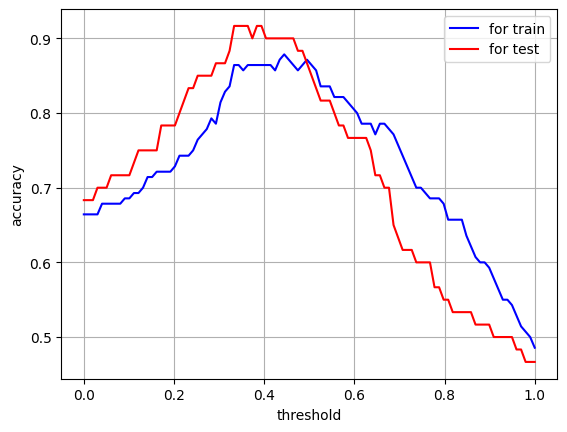

In [16]:
scan=np.linspace(0,1,100)
t_train_pred=m.predict(data_train)
accuracies_train=[np.sum((t_train_pred>thr)==t_train)/len(t_train) for thr in scan]
accuracies_test=[np.sum((t_test_pred>thr)==t_test)/len(t_test) for thr in scan]
plt.plot(scan.tolist(),accuracies_train,'b')
plt.plot(scan.tolist(),accuracies_test,'r')
plt.xlabel('threshold')
plt.ylabel('accuracy')
plt.legend(['for train','for test'])
plt.grid(1)

# Confusion Matrix

[[18  2]
 [ 7 33]]


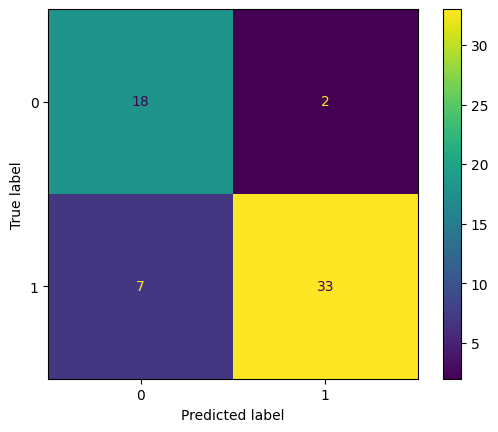

In [17]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(t_test,t_test_pred>0.5)
print(cm)
# np.sum(t_test==1)
ConfusionMatrixDisplay.from_predictions(t_test,t_test_pred>0.5)


# Why not use Accuracy?

* e.g. Cancer detection.
* Assume 0.1% of people have it
* take a super optimistic classifier ("nobody has it")
* Accuracy: 99.9% !
* It only misses each cancer case...

# Better Performance Metrics
# Precision and Recall

## Recall

 Think t==1 means a disease, easier to understand this way;
 
 $$Recall=\frac{TP}{TP+FN}$$
 
 What percentage of the seek people is recognized as such.




## Precision
$$Precision=\frac{TP}{TP+FP}$$

How much can we worry about the diagnostic?
When the diagnostic is "positive", what is the chance the patient really has the disease?



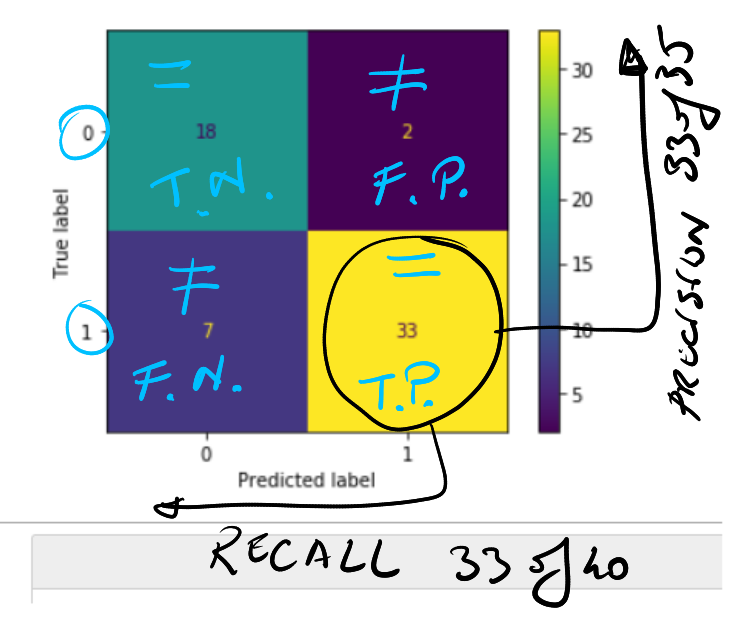

#### Discussion: how the precision and the recall vary with the threshold

#### How to compare with two numbers?

accuracy=0.85
precision=0.9428571428571428
recall=0.825


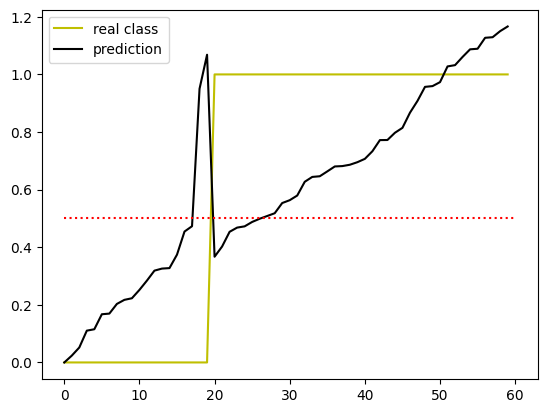

In [37]:
ix=np.argsort(t_test_pred+1e5*t_test)
plt.plot(t_test[ix],'y')
plt.plot(t_test_pred[ix],'k')
plt.legend(['real class','prediction'])
thr=0.5;
plt.plot([0,len(ix)],thr*np.ones(2),'r:');
print(f"accuracy={np.sum((t_test_pred>thr)==t_test)/len(t_test)}")
print(f"precision={sklearn.metrics.precision_score(t_test,t_test_pred>thr)}")
print(f"recall={sklearn.metrics.recall_score(t_test,t_test_pred>thr)}")

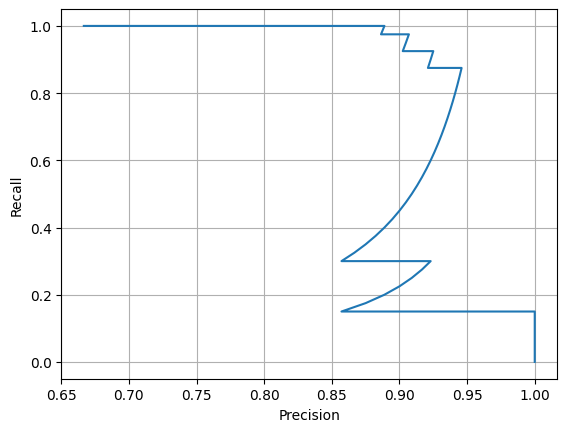

In [18]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(t_test, t_test_pred)
plt.plot(precisions,recalls,'-')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.grid(1)

# XKCD

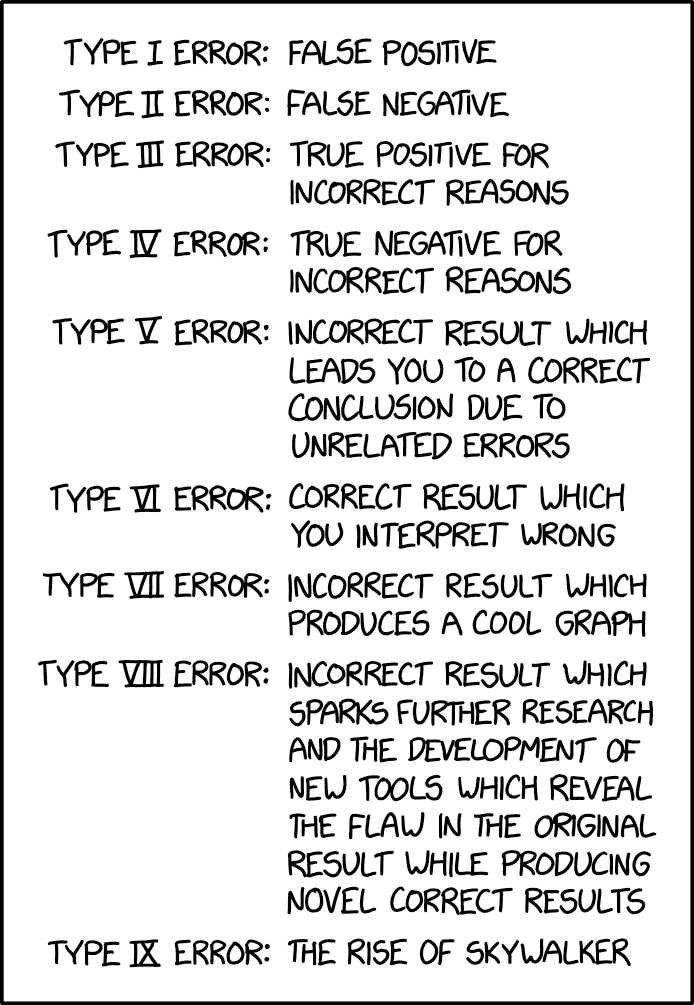
https://xkcd.com/2303/

## $F_1$-score

The harmonic mean of precision and recall:

$$F_1=\frac{2}{\frac{1}{precision}+\frac{1}{recall}}$$

Aggregating is good or bad, depending on the problem.

## Area under  the ROC Curve


#### FPR vs TPR

$$TPR=Recall=\frac{TP}{TP+FN}$$
how many of the positive instances are classified as positive

$$FPR=\frac{FP}{FP+TN}$$ 
how many of the negative instances are classified as positive

In [19]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr,tpr,thresholds=roc_curve(t_test,t_test_pred)
roc_auc_score(t_test,t_test_pred)

0.91125

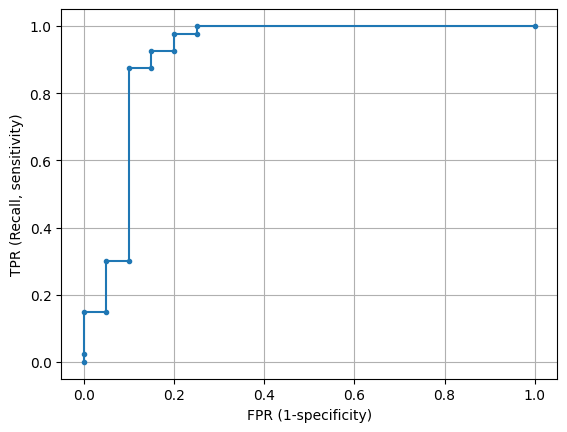

In [20]:
plt.plot(fpr,tpr,'.-')
plt.xlabel('FPR (1-specificity)')
plt.ylabel('TPR (Recall, sensitivity)')
plt.grid(1)

### ROC Curve for random guessing


0.5375


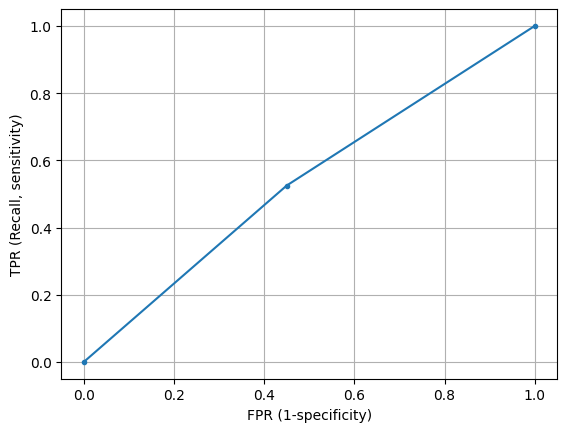

In [21]:
random_guess=np.random.rand(len(t_test))>0.5
fpr,tpr,thresholds=roc_curve(t_test,random_guess)
plt.plot(fpr,tpr,'.-')
plt.xlabel('FPR (1-specificity)')
plt.ylabel('TPR (Recall, sensitivity)')
plt.grid(1)
print(roc_auc_score(t_test,random_guess))

### ROC curve for perfect guessing

1.0


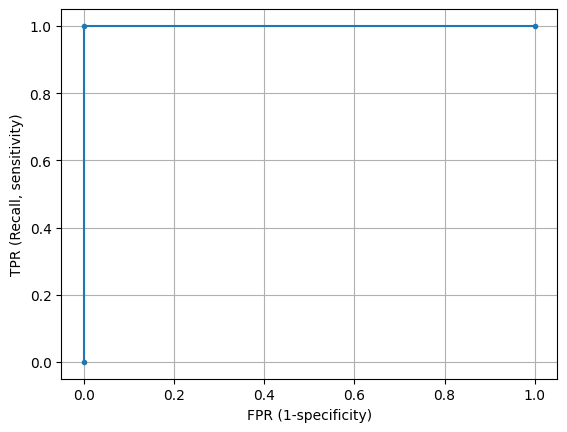

In [22]:
perfect_guess=t_test
fpr,tpr,thresholds=roc_curve(t_test,perfect_guess)
plt.plot(fpr,tpr,'.-')
plt.xlabel('FPR (1-specificity)')
plt.ylabel('TPR (Recall, sensitivity)')
plt.grid(1)
print(roc_auc_score(t_test,perfect_guess))

# Other classifiers (Model Selection)

Try true classifiers instead of regression


accuracy= 0.7642857142857142
AUC= 0.8374999999999999


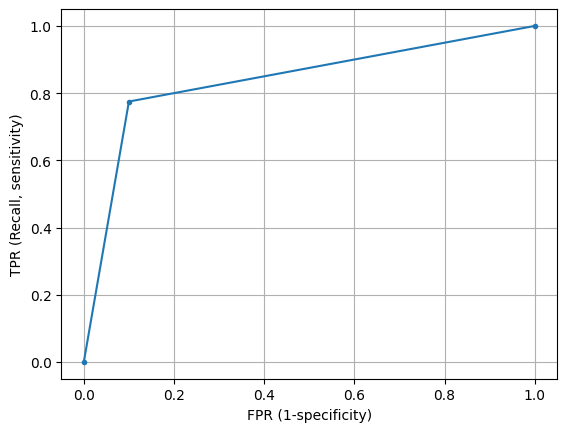

In [23]:
from sklearn.linear_model import SGDClassifier
model2=SGDClassifier()
print("accuracy=",np.mean(cross_val_score(model2,data_train,t_train, scoring="accuracy")))
model2.fit(data_train,t_train)
pred=model2.predict(data_test)
fpr,tpr,thresholds=roc_curve(t_test,pred)
plt.plot(fpr,tpr,'.-')
plt.xlabel('FPR (1-specificity)')
plt.ylabel('TPR (Recall, sensitivity)')
plt.grid(1)
print("AUC=",roc_auc_score(t_test,pred))

### What went wrong?

In [24]:
pred[:5]

array([0, 0, 1, 1, 1], dtype=int8)

#### Predictions, not scores!

accuracy= 0.8071428571428572
AUC= 0.9225


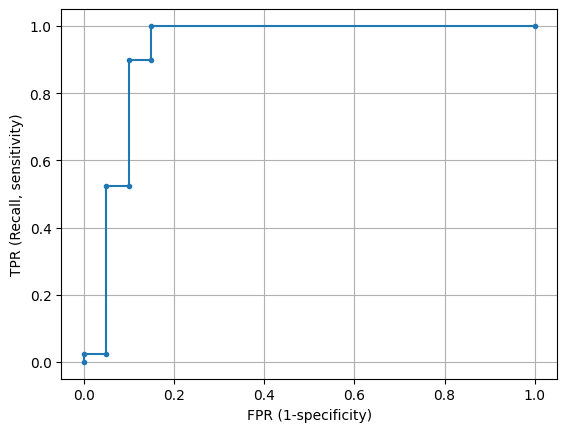

In [25]:
from sklearn.linear_model import SGDClassifier
model2=SGDClassifier()
print("accuracy=",np.mean(cross_val_score(model2,data_train,t_train, scoring="accuracy")))
model2.fit(data_train,t_train)
pred=model2.decision_function(data_test)
fpr,tpr,thresholds=roc_curve(t_test,pred)
plt.plot(fpr,tpr,'.-')
plt.xlabel('FPR (1-specificity)')
plt.ylabel('TPR (Recall, sensitivity)')
plt.grid(1)
print("AUC=",roc_auc_score(t_test,pred))

In [42]:
# model2.decision_function?

accuracy= 0.7642857142857142
AUC= 0.9225


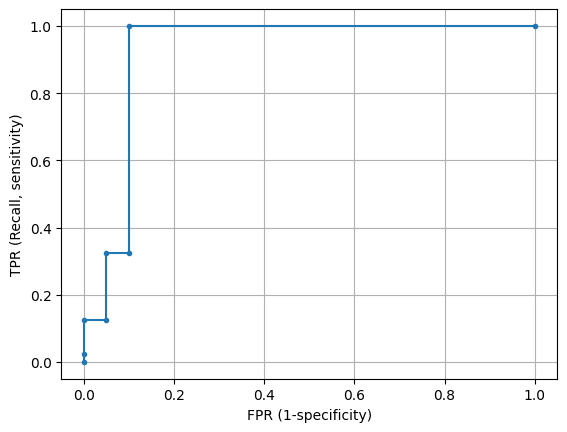

In [27]:
from sklearn.linear_model import RidgeClassifier
model3=SGDClassifier()
print("accuracy=",np.mean(cross_val_score(model3,data_train,t_train, scoring="accuracy")))
model3.fit(data_train,t_train)
pred=model3.decision_function(data_test)
fpr,tpr,thresholds=roc_curve(t_test,pred)
plt.plot(fpr,tpr,'.-')
plt.xlabel('FPR (1-specificity)')
plt.ylabel('TPR (Recall, sensitivity)')
plt.grid(1)
print("AUC=",roc_auc_score(t_test,pred))

accuracy= 0.8285714285714285
AUC= 0.9637500000000001


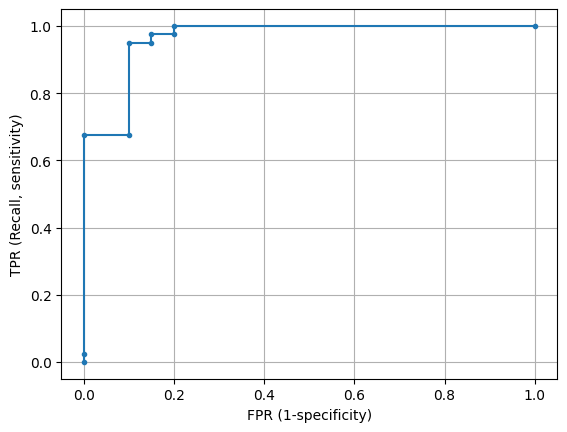

In [28]:
from sklearn.svm import SVC
# model4=SVC(kernel='linear')
model4=SVC(kernel='rbf')
print("accuracy=",np.mean(cross_val_score(model4,data_train,t_train, scoring="accuracy")))
model4.fit(data_train,t_train)
pred=model4.decision_function(data_test)
fpr,tpr,thresholds=roc_curve(t_test,pred)
plt.plot(fpr,tpr,'.-')
plt.xlabel('FPR (1-specificity)')
plt.ylabel('TPR (Recall, sensitivity)')
plt.grid(1)
print("AUC=",roc_auc_score(t_test,pred))

# Multiclass Classification

- Extend binary classification to multiple classes
     - (e.g. for digits/MNIST)
     
## One vs. All (Rest) 

- 0 vs. non-0
- 1 vs. non-1
- 2 vs. non-2
- ...
- 9 vs. non-9

K classifiers, where K is the number of classes

Decide for the classifier with highest score (activation)

## One vs. One

0 vs 1, 0 vs 2, 0 vs 3, ..., 0 vs 9

1 vs 2, 1 vs 3, ... , 1 vs 9

...

8 vs 9   

Decide for the classifier that wins most matches.

(45 classifiers for "digits")



# Test all this on a dataset

In [40]:
from sklearn.datasets import load_iris
data=load_iris()

In [41]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

...